# Neural Network, Regresion Problem

In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-10-30 07:29:26.869796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 07:29:26.869842: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [93]:
X = tf.constant(np.arange(-10, 40,3))
y = tf.constant(X+10)

In [94]:
len(X),len(y)

(17, 17)

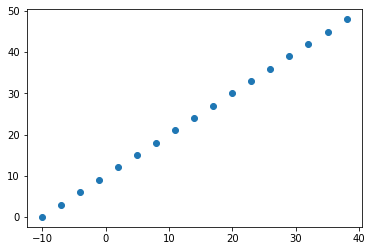

In [95]:
plt.scatter(X,y)

## Membuat model

In [96]:
tf.random.set_seed(42)
model = tf.keras.Sequential(
[tf.keras.layers.Dense(1000, input_shape=[1], activation="relu"),
tf.keras.layers.Dense(1000),
 tf.keras.layers.Dense(1000),
tf.keras.layers.Dense(1)]
)

model.compile(
loss = tf.keras.losses.mae,
optimizer = tf.keras.optimizers.Adam(lr=.001),
metrics=["mae"])

model.fit(X,y, epochs=2000, verbose=False)

In [97]:
model.evaluate([1,2,3,4,5],[11,12,13,14,15])

1/1 [==============================] - 0s 119ms/step - loss: 0.0550 - mae: 0.0550


[0.05502510070800781, 0.05502510070800781]

In [100]:
model.predict([10])

1/1 [==============================] - 0s 37ms/step


array([[20.031633]], dtype=float32)

In [101]:
model.predict([78,15,19,25,10,1000])

Oke, hasil diatas cukup baik, namun jika kita predict menggunakan nilai 1000, nilai jauh dari seharusnya. Sekarang kita coba menggunakan data yang lebih banyak

1/1 [==============================] - 0s 38ms/step


array([[  89.5038  ],
       [  25.014378],
       [  28.99989 ],
       [  34.977974],
       [  20.031637],
       [1058.502   ]], dtype=float32)

In [154]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 1000)              2000      
                                                                 
 dense_94 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_95 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_96 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 2,005,001
Trainable params: 2,005,001
Non-trainable params: 0
_________________________________________________________________


## Evaluasi dan membuat model baru dengan data yang lebih banyak

In [ ]:
X = tf.cast(tf.constant(np.arange(-1000,1000, 5)), dtype=tf.int32)
y = X + 10
len(X), len(y)

In [141]:
y

<tf.Tensor: shape=(400,), dtype=int32, numpy=
array([-990, -985, -980, -975, -970, -965, -960, -955, -950, -945, -940,
       -935, -930, -925, -920, -915, -910, -905, -900, -895, -890, -885,
       -880, -875, -870, -865, -860, -855, -850, -845, -840, -835, -830,
       -825, -820, -815, -810, -805, -800, -795, -790, -785, -780, -775,
       -770, -765, -760, -755, -750, -745, -740, -735, -730, -725, -720,
       -715, -710, -705, -700, -695, -690, -685, -680, -675, -670, -665,
       -660, -655, -650, -645, -640, -635, -630, -625, -620, -615, -610,
       -605, -600, -595, -590, -585, -580, -575, -570, -565, -560, -555,
       -550, -545, -540, -535, -530, -525, -520, -515, -510, -505, -500,
       -495, -490, -485, -480, -475, -470, -465, -460, -455, -450, -445,
       -440, -435, -430, -425, -420, -415, -410, -405, -400, -395, -390,
       -385, -380, -375, -370, -365, -360, -355, -350, -345, -340, -335,
       -330, -325, -320, -315, -310, -305, -300, -295, -290, -285, -280,
     

In [138]:
from sklearn.model_selection import train_test_split as tts

In [142]:
try:
    X_train,X_test, y_train, y_test = tts(X.numpy(),y.numpy(), train_size=0.733, random_state=42)
except Exception as ex:
    print(ex)

In [144]:
len(X_train), len(X_test), len(X)

(293, 107, 400)

In [146]:
len(y_train), len(y_test), len(y)

(293, 107, 400)

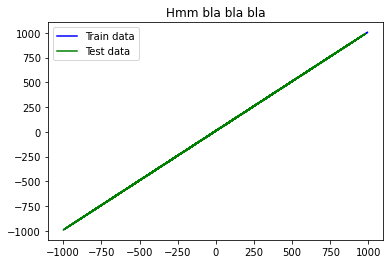

In [153]:
plt.figure()

plt.title("Diagram data")

plt.plot(X_train, y_train, c="b", label="Train data")
plt.plot(X_test, y_test, c="g", label="Test data")
plt.legend()

In [169]:
tf.random.set_seed(42)
model2 = tf.keras.Sequential(
[tf.keras.layers.Dense(1000, input_shape=[1], activation="relu"),
 tf.keras.layers.Dense(1000),
 tf.keras.layers.Dense(1000),
 tf.keras.layers.Dense(1)
]
)

# fit the model
model2.compile(loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.Adam(lr=.001),
          metrics=["mae"])

# complie the model
model2.fit(X_train,y_train, epochs=2000, verbose=False)

In [158]:
model2.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 1000)              2000      
                                                                 
 dense_102 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_103 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_104 (Dense)           (None, 1)                 1001      
                                                                 
Total params: 2,005,001
Trainable params: 2,005,001
Non-trainable params: 0
_________________________________________________________________


In [170]:
model2.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 4.0843 - mae: 4.0843


[4.084291458129883, 4.084291458129883]

In [180]:
y_predict = tf.squeeze(model2.predict(X_test))
y_predict

4/4 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(107,), dtype=float32, numpy=
array([   54.876453,   409.38235 ,  -835.00574 ,    59.869488,
        -531.3751  ,  -576.9198  ,   654.0415  ,  -526.31464 ,
         339.47977 ,  -364.37802 ,  -956.45764 ,   813.8187  ,
        -718.6143  ,  -637.64624 ,  -334.01495 ,  -789.46136 ,
         399.3962  ,   888.7145  ,   164.72334 ,   933.65186 ,
        -612.3436  ,  -926.0947  ,   963.6102  ,   364.44495 ,
       -1002.0022  ,   988.5753  ,  -425.10403 ,   134.7651  ,
         319.50763 ,  -475.70926 ,   983.5823  ,   -25.31493 ,
         314.51453 ,  -713.5539  ,   169.71637 ,  -414.98303 ,
        -430.16458 ,   718.9512  ,  -202.43979 ,  -288.47034 ,
         913.67975 ,  -723.675   ,  -617.4042  ,  -875.48987 ,
        -587.0409  ,   918.6727  ,  -253.04633 ,   -86.04806 ,
        -890.67126 ,  -126.531624,  -769.21936 ,   614.09717 ,
         698.979   ,  -647.7672  ,   878.7284  ,  -804.6428  ,
         124.77902 ,  -131.5921  ,  -850.1873  ,  -232.80368 ,
       

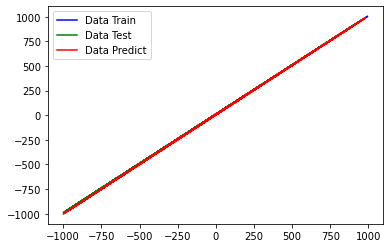

In [175]:
plt.figure()
plt.plot(X_train,y_train, c="b", label="Data Train")
plt.plot(X_test, y_test, c="g", label="Data Test")
plt.plot (X_test, y_predict, c="r", label="Data Predict")
plt.legend()
display()

In [181]:
pd.DataFrame({"Test Set":y_test,"Predict":y_predict})

,Test Set,Predict
0,55,54.876453
1,410,409.382355
2,-825,-835.005737
3,60,59.869488
4,-525,-531.375122
...,...,...
102,-910,-921.034241
103,-660,-668.009155
104,-225,-227.743011
105,-955,-966.578735
